In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
DATA_PATH = os.environ.get("DATA_PATH")

In [3]:
df = pd.read_csv(os.path.join(DATA_PATH, "aac_intakes_outcomes.csv"))

In [4]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,79662,79663,79664,79665,79666,79667,79668,79669,79670,79671
age_upon_outcome,10 years,7 years,6 years,10 years,16 years,15 years,15 years,15 years,15 years,18 years,...,2 weeks,2 weeks,2 weeks,2 weeks,2 weeks,2 weeks,2 years,1 year,10 months,10 years
animal_id_outcome,A006100,A006100,A006100,A047759,A134067,A141142,A163459,A165752,A178569,A189592,...,A769055,A769056,A769057,A769058,A769059,A769060,A769064,A769065,A769066,A769067
date_of_birth,2007-07-09 00:00:00,2007-07-09 00:00:00,2007-07-09 00:00:00,2004-04-02 00:00:00,1997-10-16 00:00:00,1998-06-01 00:00:00,1999-10-19 00:00:00,1999-08-18 00:00:00,1999-03-17 00:00:00,1997-08-01 00:00:00,...,2018-03-14 00:00:00,2018-03-14 00:00:00,2018-03-14 00:00:00,2018-03-14 00:00:00,2018-03-14 00:00:00,2018-03-14 00:00:00,2016-03-29 00:00:00,2017-03-29 00:00:00,2017-05-01 00:00:00,2008-03-29 00:00:00
outcome_subtype,NaN,NaN,NaN,Partner,NaN,NaN,NaN,NaN,NaN,NaN,...,Partner,Partner,Partner,Partner,Partner,Partner,Rabies Risk,Rabies Risk,NaN,Suffering
outcome_type,Return to Owner,Return to Owner,Return to Owner,Transfer,Return to Owner,Return to Owner,Return to Owner,Return to Owner,Return to Owner,Return to Owner,...,Transfer,Transfer,Transfer,Transfer,Transfer,Transfer,Euthanasia,Euthanasia,Return to Owner,Euthanasia
sex_upon_outcome,Neutered Male,Neutered Male,Neutered Male,Neutered Male,Neutered Male,Spayed Female,Intact Female,Neutered Male,Neutered Male,Spayed Female,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Intact Male,Spayed Female
age_upon_outcome_(days),3650,2555,2190,3650,5840,5475,5475,5475,5475,6570,...,14,14,14,14,14,14,730,365,300,3650
age_upon_outcome_(years),10.0,7.0,6.0,10.0,16.0,15.0,15.0,15.0,15.0,18.0,...,0.038356,0.038356,0.038356,0.038356,0.038356,0.038356,2.0,1.0,0.821918,10.0
age_upon_outcome_age_group,"(7.5, 10.0]","(5.0, 7.5]","(5.0, 7.5]","(7.5, 10.0]","(15.0, 17.5]","(12.5, 15.0]","(12.5, 15.0]","(12.5, 15.0]","(12.5, 15.0]","(17.5, 20.0]",...,"(-0.025, 2.5]","(-0.025, 2.5]","(-0.025, 2.5]","(-0.025, 2.5]","(-0.025, 2.5]","(-0.025, 2.5]","(-0.025, 2.5]","(-0.025, 2.5]","(-0.025, 2.5]","(7.5, 10.0]"
outcome_datetime,2017-12-07 14:07:00,2014-12-20 16:35:00,2014-03-08 17:10:00,2014-04-07 15:12:00,2013-11-16 11:54:00,2013-11-17 11:40:00,2014-11-14 19:28:00,2014-09-15 16:35:00,2014-03-23 15:57:00,2015-09-18 19:04:00,...,2018-03-29 18:12:00,2018-03-29 18:13:00,2018-03-29 18:13:00,2018-03-29 18:13:00,2018-03-30 09:23:00,2018-03-29 18:14:00,2018-03-29 18:30:00,2018-03-29 18:28:00,2018-03-31 12:37:00,2018-03-30 13:52:00


In [5]:
df.columns #all the columns of the data

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

In [6]:
df.shape #dimensions of the data

(79672, 41)

In [7]:
df.isna().sum() #sum of null values across all the columns

age_upon_outcome                  0
animal_id_outcome                 0
date_of_birth                     0
outcome_subtype               43324
outcome_type                     10
sex_upon_outcome                  1
age_upon_outcome_(days)           0
age_upon_outcome_(years)          0
age_upon_outcome_age_group        0
outcome_datetime                  0
outcome_month                     0
outcome_year                      0
outcome_monthyear                 0
outcome_weekday                   0
outcome_hour                      0
outcome_number                    0
dob_year                          0
dob_month                         0
dob_monthyear                     0
age_upon_intake                   0
animal_id_intake                  0
animal_type                       0
breed                             0
color                             0
found_location                    0
intake_condition                  0
intake_type                       0
sex_upon_intake             

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome            79672 non-null  object 
 1   animal_id_outcome           79672 non-null  object 
 2   date_of_birth               79672 non-null  object 
 3   outcome_subtype             36348 non-null  object 
 4   outcome_type                79662 non-null  object 
 5   sex_upon_outcome            79671 non-null  object 
 6   age_upon_outcome_(days)     79672 non-null  int64  
 7   age_upon_outcome_(years)    79672 non-null  float64
 8   age_upon_outcome_age_group  79672 non-null  object 
 9   outcome_datetime            79672 non-null  object 
 10  outcome_month               79672 non-null  int64  
 11  outcome_year                79672 non-null  int64  
 12  outcome_monthyear           79672 non-null  object 
 13  outcome_weekday             796

### Feature by feature analysis

In [9]:
df['animal_type'].value_counts()

animal_type
Dog      45366
Cat      29539
Other     4428
Bird       339
Name: count, dtype: int64

In [10]:
df['outcome_type'].value_counts() #could be a potential output feature

outcome_type
Adoption           33594
Transfer           23799
Return to Owner    14791
Euthanasia          6244
Died                 690
Disposal             304
Rto-Adopt            179
Missing               46
Relocate              15
Name: count, dtype: int64

In [11]:
df['sex_upon_intake'].value_counts()

sex_upon_intake
Intact Male      25317
Intact Female    23704
Neutered Male    12708
Spayed Female    11153
Unknown           6789
Name: count, dtype: int64

## Analysing some data specifically about dogs

In [12]:
dog_data = df[df["animal_type"]=="Dog"]

<Figure size 1000x700 with 0 Axes>

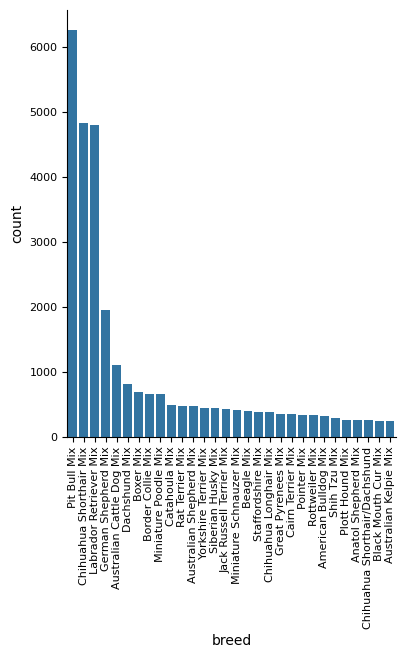

In [13]:
plt.figure(figsize=(10, 7))
sns.catplot(dog_data["breed"].value_counts().nlargest(30), kind="bar")
plt.xticks(rotation=90)
plt.tick_params(labelsize=8)
plt.show()

In [14]:
print("Unique dog breed(s):-\n")
for breed, count in dog_data["breed"].value_counts().items():
    print(breed, count)

Unique dog breed(s):-

Pit Bull Mix 6256
Chihuahua Shorthair Mix 4831
Labrador Retriever Mix 4789
German Shepherd Mix 1950
Australian Cattle Dog Mix 1099
Dachshund Mix 811
Boxer Mix 683
Border Collie Mix 662
Miniature Poodle Mix 662
Catahoula Mix 480
Rat Terrier Mix 469
Australian Shepherd Mix 468
Yorkshire Terrier Mix 447
Siberian Husky Mix 441
Jack Russell Terrier Mix 429
Miniature Schnauzer Mix 402
Beagle Mix 392
Staffordshire Mix 375
Chihuahua Longhair Mix 371
Great Pyrenees Mix 349
Cairn Terrier Mix 348
Pointer Mix 336
Rottweiler Mix 325
American Bulldog Mix 318
Shih Tzu Mix 292
Plott Hound Mix 253
Anatol Shepherd Mix 253
Chihuahua Shorthair/Dachshund 251
Black Mouth Cur Mix 246
Australian Kelpie Mix 240
Labrador Retriever 239
German Shepherd 236
Pit Bull 233
American Staffordshire Terrier Mix 219
Labrador Retriever/Pit Bull 215
Chihuahua Shorthair 204
Dachshund/Chihuahua Shorthair 179
American Pit Bull Terrier Mix 169
German Shepherd/Labrador Retriever 160
Golden Retriever Mix 15

<Figure size 1000x700 with 0 Axes>

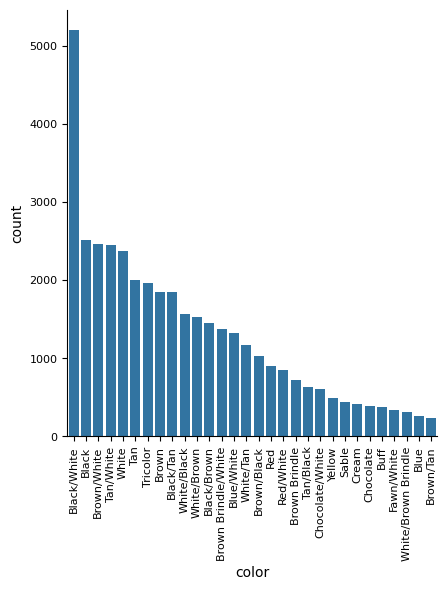

In [15]:
plt.figure(figsize=(10, 7))
sns.catplot(dog_data["color"].value_counts().nlargest(30), kind="bar")
plt.xticks(rotation=90)
plt.tick_params(labelsize=8)
plt.show()

In [16]:
df[df["animal_type"]=="Cat"]["breed"].value_counts()

breed
Domestic Shorthair Mix                  23423
Domestic Medium Hair Mix                 2326
Domestic Longhair Mix                    1248
Siamese Mix                               996
Domestic Shorthair                        387
                                        ...  
Siamese/Angora                              1
Domestic Shorthair/British Shorthair        1
Domestic Longhair/Domestic Longhair         1
Snowshoe/Domestic Shorthair                 1
Scottish Fold/Domestic Shorthair            1
Name: count, Length: 82, dtype: int64

In [17]:
df[df["animal_type"]=="Bird"]["breed"].value_counts()

breed
Chicken Mix         114
Chicken              25
Parakeet Mix         17
Duck Mix             15
Dove Mix             15
Pigeon Mix           13
Duck                 13
Cockatiel Mix         9
Grackle Mix           8
Bantam Mix            8
Pigeon                6
Parakeet              6
Turkey Mix            5
Sparrow Mix           4
Parrot Mix            4
Quaker Mix            4
Hawk                  4
Owl Mix               4
Grackle               4
Dove                  3
Peafowl               3
Cockatoo              3
Mockingbird Mix       3
Rhode Island Mix      3
Bluebird Mix          3
Heron Mix             3
Conure                2
Muscovy               2
Peafowl Mix           2
Finch                 2
Parrot                2
Heron                 2
Quaker                2
Muscovy Mix           2
African Mix           1
Pheasant Mix          1
Owl                   1
Cockatoo Mix          1
Barred Rock Mix       1
Crow Mix              1
Song Bird Mix         1
Hawk Mix  

**Observation:** Most intakes seem to be of "mix" type; meaning the animals have been cross bred across several breeds among their respective species

In [18]:
df["is_mix"] = df["breed"].apply(lambda x: "Yes" if "mix" in x.lower() else "No") #creating a new feature which may be useful prediction

In [19]:
df["is_mix"].value_counts()

is_mix
Yes    66999
No     12673
Name: count, dtype: int64

In [20]:
df["intake_condition"].value_counts()

intake_condition
Normal      70056
Injured      3997
Sick         3099
Nursing      1915
Aged          319
Other         147
Feral          92
Pregnant       47
Name: count, dtype: int64

In [21]:
df["age_upon_outcome_age_group"].value_counts()

age_upon_outcome_age_group
(-0.025, 2.5]    59412
(2.5, 5.0]       11068
(7.5, 10.0]       3619
(5.0, 7.5]        3423
(10.0, 12.5]      1057
(12.5, 15.0]       868
(15.0, 17.5]       166
(17.5, 20.0]        54
(20.0, 22.5]         4
(22.5, 25.0]         1
Name: count, dtype: int64

In [22]:
df["intake_type"].value_counts()

intake_type
Stray                 55935
Owner Surrender       15028
Public Assist          4994
Wildlife               3464
Euthanasia Request      251
Name: count, dtype: int64

In [23]:
df["parent_breed"] = df["breed"].apply(lambda x: x.replace("Mix","") if "Mix" in x else x) #removing the word "mix" for a more generalised view of breeds

In [24]:
df["parent_breed"].value_counts()

parent_breed
Domestic Shorthair                  23423
Pit Bull                             6256
Chihuahua Shorthair                  4831
Labrador Retriever                   4789
Domestic Medium Hair                 2326
                                    ...  
Miniature Poodle/Havanese               1
Rabbit Lh                               1
French Bulldog/Pug                      1
Irish Terrier/Irish Wolfhound           1
Australian Shepherd/Basset Hound        1
Name: count, Length: 2155, dtype: int64

In [25]:
df["breed_unsure"] = df["parent_breed"].apply(lambda x: x.split("/") if "/" in x else x)

In [26]:
for breed, count in df["breed_unsure"].value_counts().items():
    if type(breed) == list:
        print(breed ,"=>", count)

['Chihuahua Shorthair', 'Dachshund'] => 251
['Labrador Retriever', 'Pit Bull'] => 215
['Dachshund', 'Chihuahua Shorthair'] => 179
['German Shepherd', 'Labrador Retriever'] => 160
['Labrador Retriever', 'German Shepherd'] => 140
['Pit Bull', 'Labrador Retriever'] => 106
['Labrador Retriever', 'Border Collie'] => 79
['Black', 'Tan Hound '] => 77
['Labrador Retriever', 'Australian Cattle Dog'] => 74
['Miniature Schnauzer', 'Miniature Poodle'] => 74
['Border Collie', 'Labrador Retriever'] => 71
['Australian Cattle Dog', 'Labrador Retriever'] => 62
['Chihuahua Shorthair', 'Rat Terrier'] => 61
['Chihuahua Shorthair', 'Jack Russell Terrier'] => 59
['Maltese', 'Miniature Poodle'] => 55
['Pit Bull', 'Boxer'] => 53
['Labrador Retriever', 'Boxer'] => 52
['Chihuahua Shorthair', 'Pug'] => 51
['Labrador Retriever', 'Great Pyrenees'] => 50
['Rat Terrier', 'Chihuahua Shorthair'] => 49
['Boxer', 'Pit Bull'] => 47
['Labrador Retriever', 'Beagle'] => 45
['Labrador Retriever', 'Pointer'] => 43
['Jack Russ

In [27]:
df["color_combination"] = df["color"].apply(lambda x: " and ".join(x.split("/")) if "/" in x else x)

In [28]:
print("Count of animals with fur of multiple colors :-\n")
for color, count in df["color_combination"].value_counts().items():
    if "and" in color:
        print(color,"->",count)

Count of animals with fur of multiple colors :-

Black and White -> 8270
Brown and White -> 2516
Tan and White -> 2462
Brown Tabby and White -> 2351
White and Black -> 2172
Blue and White -> 2127
Black and Tan -> 1847
Black and Brown -> 1619
White and Brown -> 1604
Brown Brindle and White -> 1374
Brown and Black -> 1367
White and Tan -> 1195
Orange Tabby and White -> 1105
Red and White -> 858
Tan and Black -> 637
Chocolate and White -> 614
Blue Tabby and White -> 542
White and Blue -> 359
Gray and White -> 340
Fawn and White -> 338
Gray and Black -> 337
White and Brown Brindle -> 312
Black and Gray -> 297
White and Brown Tabby -> 296
White and Gray -> 275
Brown and Tan -> 249
Cream Tabby and White -> 237
Sable and White -> 218
Black Brindle and White -> 190
Red and Black -> 182
White and Red -> 180
Torbie and White -> 176
Chocolate and Tan -> 176
Cream and White -> 167
Black and Tricolor -> 153
White and Tricolor -> 147
Buff and White -> 118
Black and Black -> 113
Yellow and White -> 1

In [29]:
# This feature is important since it is a well-established fact that animals with a certain fur color are more likely to end up in shelters, 
# thereby also influencing the outcome type. 

def multicolor_fur(color):
    """To determine whether an animal has multicolor coat"""
    fur_color = color.split(" and ")

    if len(fur_color) == 2: #this is post splitting the string on "and"; to check if the output has two colors
        if fur_color[0] != fur_color[1]: #this condition needed to be in place since there are some redundant values like "Brown Brindle and Brown Brindle"
            return "Yes"
        else:
            return "No"

    return "No" 

In [30]:
multicolor_fur("Brown Brindle") #test value

'No'

In [31]:
df["animal_has_multicolor_fur"] = df["color_combination"].apply(multicolor_fur)

In [32]:
df["animal_has_multicolor_fur"].value_counts()

animal_has_multicolor_fur
Yes    41615
No     38057
Name: count, dtype: int64

In [33]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days', 'is_mix',
       'parent_breed', 'breed_unsure', 'color_combination',
       'animal_has_multicolor_fur'],
      dtype='object')

In [34]:
df.shape # 5 new columns

(79672, 46)

In [35]:
df["outcome_subtype"].value_counts()

outcome_subtype
Partner                19840
Foster                  5490
SCRP                    3205
Suffering               2549
Rabies Risk             2539
Snr                      752
Aggressive               497
In Kennel                351
Offsite                  350
Medical                  265
In Foster                177
Behavior                 133
At Vet                    71
Enroute                   49
Underage                  28
Court/Investigation       23
In Surgery                17
Possible Theft             9
Barn                       3
Name: count, dtype: int64

In [36]:
df["outcome_subtype"].isna().sum().sum()

43324

In [37]:
df["outcome_subtype"].fillna("Other", inplace=True)

/var/folders/y1/j_mlyp_n78v_cl5s_vpqc0r80000gn/T/ipykernel_74327/4206745568.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["outcome_subtype"].fillna("Other", inplace=True)


In [38]:
df["outcome_subtype"].value_counts()

outcome_subtype
Other                  43324
Partner                19840
Foster                  5490
SCRP                    3205
Suffering               2549
Rabies Risk             2539
Snr                      752
Aggressive               497
In Kennel                351
Offsite                  350
Medical                  265
In Foster                177
Behavior                 133
At Vet                    71
Enroute                   49
Underage                  28
Court/Investigation       23
In Surgery                17
Possible Theft             9
Barn                       3
Name: count, dtype: int64

In [39]:
pd.crosstab(df["outcome_type"], df["outcome_subtype"])

outcome_subtype,Aggressive,At Vet,Barn,Behavior,Court/Investigation,Enroute,Foster,In Foster,In Kennel,In Surgery,Medical,Offsite,Other,Partner,Possible Theft,Rabies Risk,SCRP,Snr,Suffering,Underage
outcome_type,,,,,,,,,,,,,,,,,,,,
Adoption,0,0,1,0,0,0,5490,0,0,0,0,350,27753,0,0,0,0,0,0,0
Died,0,34,0,0,0,49,0,159,343,17,0,0,88,0,0,0,0,0,0,0
Disposal,0,0,0,0,0,0,0,0,0,0,0,0,304,0,0,0,0,0,0,0
Euthanasia,497,36,0,133,23,0,0,0,0,0,265,0,174,0,0,2539,0,0,2549,28
Missing,0,0,0,0,0,0,0,18,8,0,0,0,11,0,9,0,0,0,0,0
Relocate,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0
Return to Owner,0,1,0,0,0,0,0,0,0,0,0,0,14790,0,0,0,0,0,0,0
Rto-Adopt,0,0,0,0,0,0,0,0,0,0,0,0,179,0,0,0,0,0,0,0
Transfer,0,0,2,0,0,0,0,0,0,0,0,0,0,19840,0,0,3205,752,0,0


In [40]:
df["time_in_shelter_days"].describe()

count    79672.000000
mean        16.757116
std         41.679359
min          0.000000
25%          1.102083
50%          4.987153
75%         13.610764
max       1606.194444
Name: time_in_shelter_days, dtype: float64

In [41]:
# df.isna().sum()

In [42]:
df["outcome_type"].fillna("Other", inplace=True)

/var/folders/y1/j_mlyp_n78v_cl5s_vpqc0r80000gn/T/ipykernel_74327/1023341262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["outcome_type"].fillna("Other", inplace=True)


In [43]:
df["outcome_type"].value_counts()

outcome_type
Adoption           33594
Transfer           23799
Return to Owner    14791
Euthanasia          6244
Died                 690
Disposal             304
Rto-Adopt            179
Missing               46
Relocate              15
Other                 10
Name: count, dtype: int64

In [44]:
df["sex_upon_outcome"].fillna("Unknown", inplace=True)

/var/folders/y1/j_mlyp_n78v_cl5s_vpqc0r80000gn/T/ipykernel_74327/474113660.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sex_upon_outcome"].fillna("Unknown", inplace=True)


In [45]:
df["sex_upon_intake"].fillna("Unknown", inplace=True)

/var/folders/y1/j_mlyp_n78v_cl5s_vpqc0r80000gn/T/ipykernel_74327/4035911783.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sex_upon_intake"].fillna("Unknown", inplace=True)


In [46]:
df.isna().sum().sum() #succefully imputed all NaN values

0

In [47]:
df

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,is_mix,parent_breed,breed_unsure,color_combination,animal_has_multicolor_fur
0,10 years,A006100,2007-07-09 00:00:00,Other,Return to Owner,Neutered Male,3650,10.000000,"(7.5, 10.0]",2017-12-07 14:07:00,...,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,Yes,Spinone Italiano,Spinone Italiano,Yellow and White,Yes
1,7 years,A006100,2007-07-09 00:00:00,Other,Return to Owner,Neutered Male,2555,7.000000,"(5.0, 7.5]",2014-12-20 16:35:00,...,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,Yes,Spinone Italiano,Spinone Italiano,Yellow and White,Yes
2,6 years,A006100,2007-07-09 00:00:00,Other,Return to Owner,Neutered Male,2190,6.000000,"(5.0, 7.5]",2014-03-08 17:10:00,...,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,Yes,Spinone Italiano,Spinone Italiano,Yellow and White,Yes
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.000000,"(7.5, 10.0]",2014-04-07 15:12:00,...,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,No,Dachshund,Dachshund,Tricolor,No
4,16 years,A134067,1997-10-16 00:00:00,Other,Return to Owner,Neutered Male,5840,16.000000,"(15.0, 17.5]",2013-11-16 11:54:00,...,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,No,Shetland Sheepdog,Shetland Sheepdog,Brown and White,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79667,2 weeks,A769060,2018-03-14 00:00:00,Partner,Transfer,Unknown,14,0.038356,"(-0.025, 2.5]",2018-03-29 18:14:00,...,Thursday,16,1.0,0 days 01:51:00.000000000,0.077083,Yes,Domestic Shorthair,Domestic Shorthair,Tortie,No
79668,2 years,A769064,2016-03-29 00:00:00,Rabies Risk,Euthanasia,Unknown,730,2.000000,"(-0.025, 2.5]",2018-03-29 18:30:00,...,Thursday,17,1.0,0 days 01:17:00.000000000,0.053472,Yes,Bat,Bat,Brown,No
79669,1 year,A769065,2017-03-29 00:00:00,Rabies Risk,Euthanasia,Unknown,365,1.000000,"(-0.025, 2.5]",2018-03-29 18:28:00,...,Thursday,17,1.0,0 days 01:09:00.000000000,0.047917,Yes,Bat,Bat,Brown,No
79670,10 months,A769066,2017-05-01 00:00:00,Other,Return to Owner,Intact Male,300,0.821918,"(-0.025, 2.5]",2018-03-31 12:37:00,...,Thursday,18,1.0,1 days 18:18:00.000000000,1.762500,Yes,Labrador Retriever,Labrador Retriever,Black and White,Yes


In [48]:
df["intake_condition"].value_counts()

intake_condition
Normal      70056
Injured      3997
Sick         3099
Nursing      1915
Aged          319
Other         147
Feral          92
Pregnant       47
Name: count, dtype: int64

In [49]:
df["age_upon_intake_(years)"].describe()

count    79672.000000
mean         2.107785
std          2.893175
min          0.000000
25%          0.164384
50%          1.000000
75%          3.000000
max         25.000000
Name: age_upon_intake_(years), dtype: float64

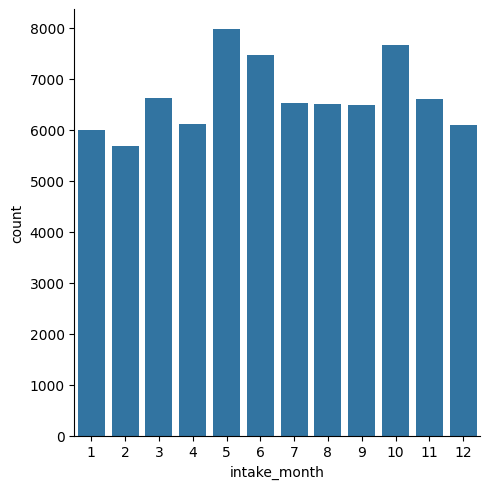

In [50]:
sns.catplot(df["intake_month"].value_counts(), kind="bar")

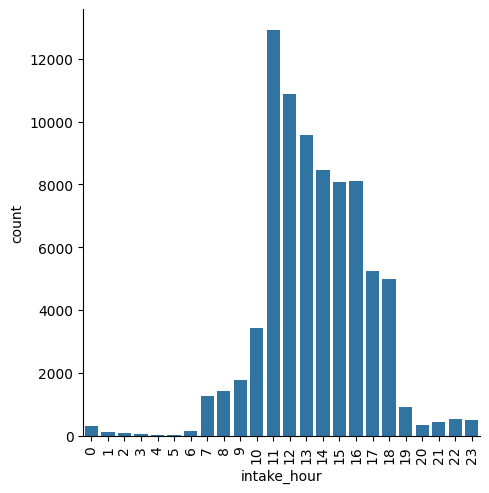

In [51]:
sns.catplot(df["intake_hour"].value_counts(), kind="bar")
plt.xticks(rotation=90)
plt.show()

## Feature selection

In [52]:
for i, j in enumerate(df.columns):
    print(i, j)

0 age_upon_outcome
1 animal_id_outcome
2 date_of_birth
3 outcome_subtype
4 outcome_type
5 sex_upon_outcome
6 age_upon_outcome_(days)
7 age_upon_outcome_(years)
8 age_upon_outcome_age_group
9 outcome_datetime
10 outcome_month
11 outcome_year
12 outcome_monthyear
13 outcome_weekday
14 outcome_hour
15 outcome_number
16 dob_year
17 dob_month
18 dob_monthyear
19 age_upon_intake
20 animal_id_intake
21 animal_type
22 breed
23 color
24 found_location
25 intake_condition
26 intake_type
27 sex_upon_intake
28 count
29 age_upon_intake_(days)
30 age_upon_intake_(years)
31 age_upon_intake_age_group
32 intake_datetime
33 intake_month
34 intake_year
35 intake_monthyear
36 intake_weekday
37 intake_hour
38 intake_number
39 time_in_shelter
40 time_in_shelter_days
41 is_mix
42 parent_breed
43 breed_unsure
44 color_combination
45 animal_has_multicolor_fur


In [53]:
df.head().T

,0,1,2,3,4
age_upon_outcome,10 years,7 years,6 years,10 years,16 years
animal_id_outcome,A006100,A006100,A006100,A047759,A134067
date_of_birth,2007-07-09 00:00:00,2007-07-09 00:00:00,2007-07-09 00:00:00,2004-04-02 00:00:00,1997-10-16 00:00:00
outcome_subtype,Other,Other,Other,Partner,Other
outcome_type,Return to Owner,Return to Owner,Return to Owner,Transfer,Return to Owner
sex_upon_outcome,Neutered Male,Neutered Male,Neutered Male,Neutered Male,Neutered Male
age_upon_outcome_(days),3650,2555,2190,3650,5840
age_upon_outcome_(years),10.0,7.0,6.0,10.0,16.0
age_upon_outcome_age_group,"(7.5, 10.0]","(5.0, 7.5]","(5.0, 7.5]","(7.5, 10.0]","(15.0, 17.5]"
outcome_datetime,2017-12-07 14:07:00,2014-12-20 16:35:00,2014-03-08 17:10:00,2014-04-07 15:12:00,2013-11-16 11:54:00


In [79]:
df["sex_upon_intake"].value_counts()

sex_upon_intake
Intact Male      25317
Intact Female    23704
Neutered Male    12708
Spayed Female    11153
Unknown           6790
Name: count, dtype: int64

In [80]:
df["sex_upon_outcome"].value_counts()

sex_upon_outcome
Neutered Male    28293
Spayed Female    25549
Intact Male       9732
Intact Female     9308
Unknown           6790
Name: count, dtype: int64

In [81]:
print([c for c in df.columns if "outcome" not in c]) #we don't need outcome related data since that is what we aim to predict

['date_of_birth', 'dob_year', 'dob_month', 'dob_monthyear', 'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color', 'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake', 'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)', 'age_upon_intake_age_group', 'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter', 'time_in_shelter_days', 'is_mix', 'parent_breed', 'breed_unsure', 'color_combination', 'animal_has_multicolor_fur']


In [85]:
# creating a primary subset

df_temp = df[['date_of_birth', 'dob_year', 'dob_month', 'dob_monthyear', 'age_upon_intake', 'animal_id_intake', 'animal_type', 
              'breed', 'color', 'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake', 'count', 'age_upon_intake_(days)', 
              'age_upon_intake_(years)', 'age_upon_intake_age_group', 'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear', 
              'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter', 'time_in_shelter_days', 'is_mix', 'parent_breed', 
              'breed_unsure', 'color_combination', 'animal_has_multicolor_fur']] 

In [58]:
df_temp.shape

(79672, 32)

In [59]:
df_temp["date_of_birth"].min()

'1991-12-11 00:00:00'

In [60]:
df_temp["date_of_birth"].max()

'2018-03-25 00:00:00'

In [61]:
df_temp.columns

Index(['date_of_birth', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days', 'is_mix',
       'parent_breed', 'breed_unsure', 'color_combination',
       'animal_has_multicolor_fur', 'outcome_type'],
      dtype='object')

In [74]:
df_temp_1 = df_temp.iloc[:,4:]

In [75]:
df_temp_1.columns

Index(['age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days', 'is_mix',
       'parent_breed', 'breed_unsure', 'color_combination',
       'animal_has_multicolor_fur', 'outcome_type'],
      dtype='object')

## Training data preparation

In [76]:
df_temp_1.columns

Index(['age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days', 'is_mix',
       'parent_breed', 'breed_unsure', 'color_combination',
       'animal_has_multicolor_fur', 'outcome_type'],
      dtype='object')

In [77]:
df_temp_1.drop(['animal_id_intake', 'breed', 'color',
                'found_location', 'age_upon_intake_(days)', 'intake_datetime',
                'intake_year', 'intake_monthyear'], axis=1, inplace=True)

In [78]:
df_temp_1.to_csv(os.path.join(DATA_PATH, "modelling_data.csv"), index=False)